In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd
import time

# Read the CSV file
df = pd.read_csv("synthetic_data.csv")

# Get the start time
start_time = time.time()


In [3]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,y
0,1,0.031390,0.031390,0.031390,0.031390,0.031390,0.031390,0.031390,0.031390,0.031390,1
1,1,5.234565,5.234565,5.234565,5.234565,5.234565,5.234565,5.234565,5.234565,5.234565,1
2,1,9.354209,9.354209,9.354209,9.354209,9.354209,9.354209,9.354209,9.354209,9.354209,1
3,1,-8.133407,-8.133407,-8.133407,-8.133407,-8.133407,-8.133407,-8.133407,-8.133407,-8.133407,0
4,1,-5.471547,-5.471547,-5.471547,-5.471547,-5.471547,-5.471547,-5.471547,-5.471547,-5.471547,0


In [4]:
# map between integer label and categorical target

cat_map = dict(zip(df["y"].astype("category").cat.codes, df["y"]))
print("\nTarget integer-label encoding:", cat_map, "\n\n")

# categorical target --> integer label

df["y"] = df["y"].astype("category").cat.codes

#################################################################################

# taking only species 1 and 0 -- binary classification

df = df[df["y"].isin([0, 1])]

#################################################################################

df.info()


Target integer-label encoding: {1: 1, 0: 0} 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      50000 non-null  int64  
 1   X2      50000 non-null  float64
 2   X3      50000 non-null  float64
 3   X4      50000 non-null  float64
 4   X5      50000 non-null  float64
 5   X6      50000 non-null  float64
 6   X7      50000 non-null  float64
 7   X8      50000 non-null  float64
 8   X9      50000 non-null  float64
 9   X10     50000 non-null  float64
 10  y       50000 non-null  int8   
dtypes: float64(9), int64(1), int8(1)
memory usage: 3.9 MB


In [5]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,y
count,50000.0,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.0,0.028783,0.028783,0.028783,0.028783,0.028783,0.028783,0.028783,0.028783,0.028783,0.478760
std,0.0,5.761384,5.761384,5.761384,5.761384,5.761384,5.761384,5.761384,5.761384,5.761384,0.499554
min,1.0,-9.999899,-9.999899,-9.999899,-9.999899,-9.999899,-9.999899,-9.999899,-9.999899,-9.999899,0.000000
25%,1.0,-4.926806,-4.926806,-4.926806,-4.926806,-4.926806,-4.926806,-4.926806,-4.926806,-4.926806,0.000000
50%,1.0,0.057610,0.057610,0.057610,0.057610,0.057610,0.057610,0.057610,0.057610,0.057610,0.000000
75%,1.0,4.996073,4.996073,4.996073,4.996073,4.996073,4.996073,4.996073,4.996073,4.996073,1.000000
max,1.0,9.999712,9.999712,9.999712,9.999712,9.999712,9.999712,9.999712,9.999712,9.999712,1.000000


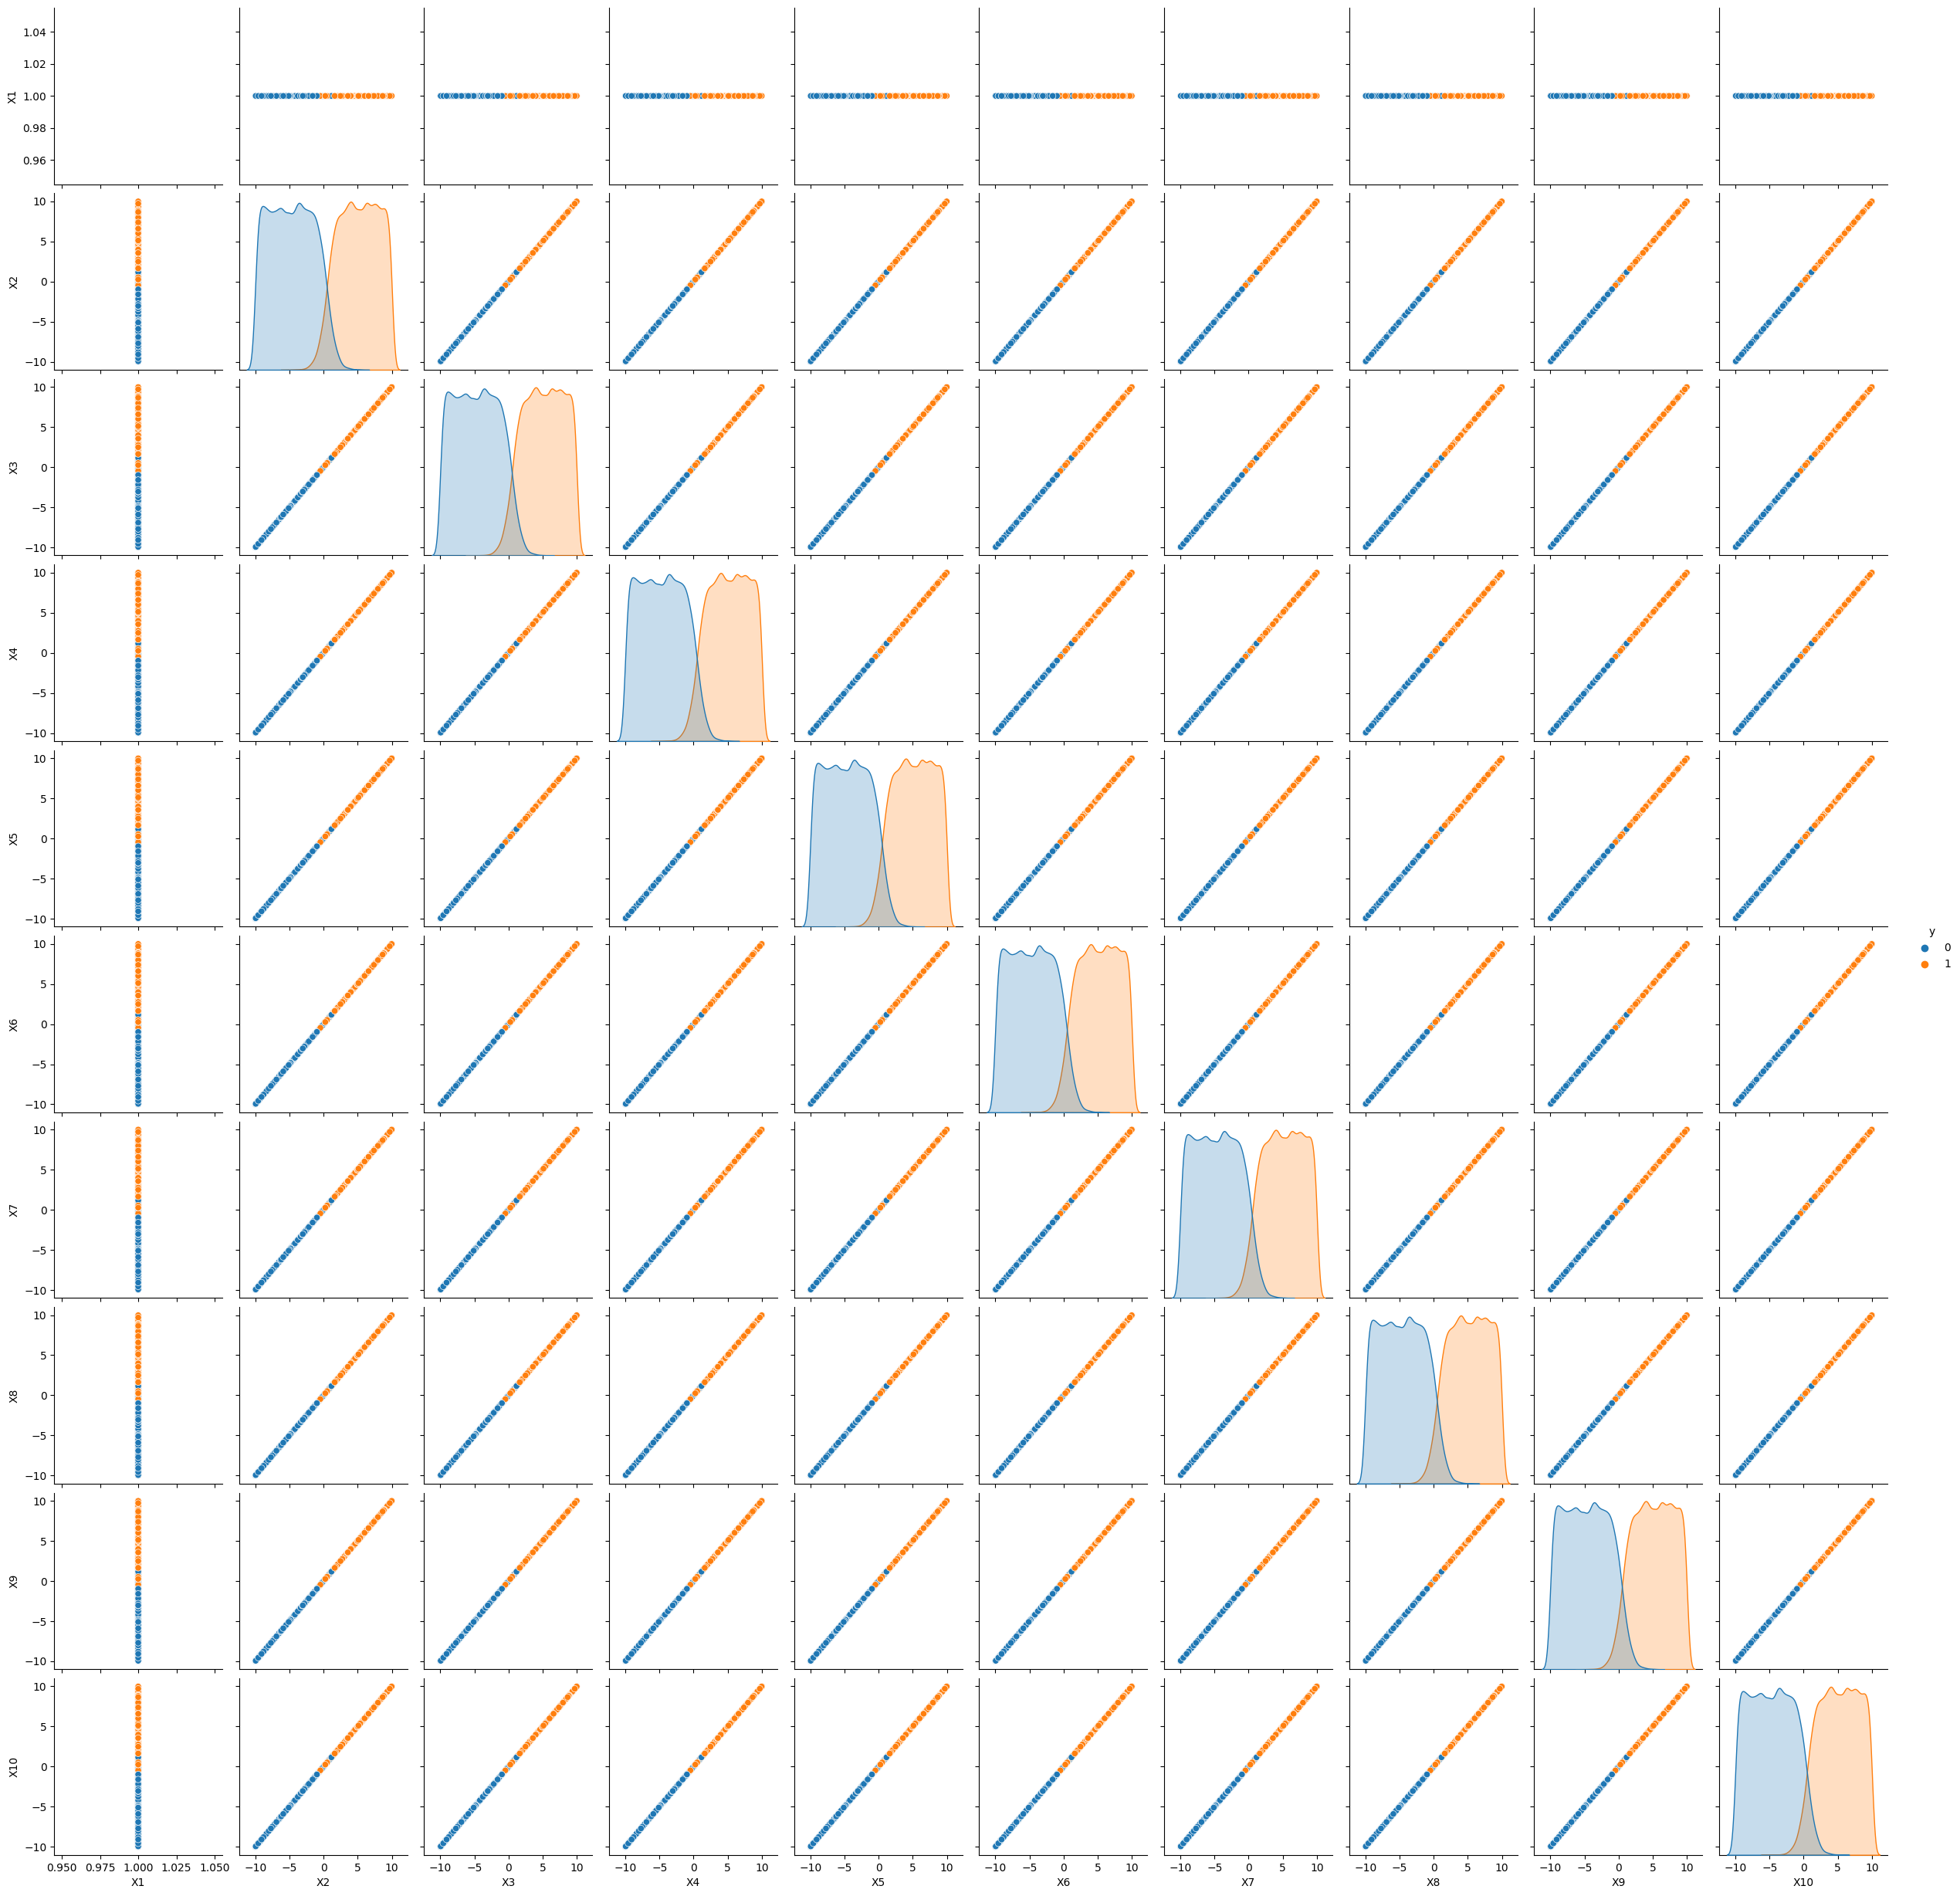

In [6]:
sns.pairplot(df, hue="y")

In [8]:
# features
X = df.drop(columns="y")
# target
y = df["y"]


In [9]:
# train-test split, 20% test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42, 
                                                    stratify=y)

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

# Create an imputer to replace NaN values with the mean
imputer = SimpleImputer(strategy='mean')

# Create a pipeline with the imputer and logistic regression
pipeline = Pipeline([
    ('imputer', imputer),
    ('logit', LogisticRegression(random_state=42))
])

# Fit the pipeline on your data
pipeline.fit(X, y)

# Predict using the trained model
y_pred = pipeline.predict(X_test)

# Print classification report and confusion matrix
print("Classical classifier (Logistic Regression):\n")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Classical classifier (Logistic Regression):

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      5212
           1       0.95      0.95      0.95      4788

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000

[[4964  248]
 [ 248 4540]]


In [11]:
#Variational Quantum Classifier

In [12]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

In [13]:
# we'll encode each feature in a single qubit. Thus, that's the number of qubits

N = X.shape[1]


Initial Circuit:



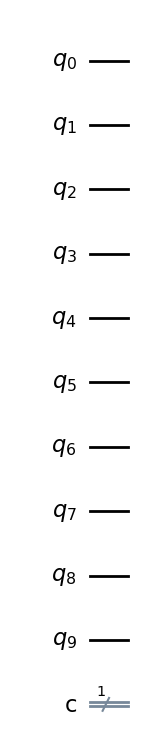

In [14]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
qr = QuantumRegister(N, "q")
cr = ClassicalRegister(1, "c")

qc = QuantumCircuit(qr, cr)

print("\nInitial Circuit:\n")

qc.draw("mpl")


In [15]:
# selecting one single observation

k = 0
obs_k = X_train.iloc[k]

In [16]:
obs_k

X1     1.000000
X2     2.406036
X3     2.406036
X4     2.406036
X5     2.406036
X6     2.406036
X7     2.406036
X8     2.406036
X9     2.406036
X10    2.406036
Name: 40344, dtype: float64

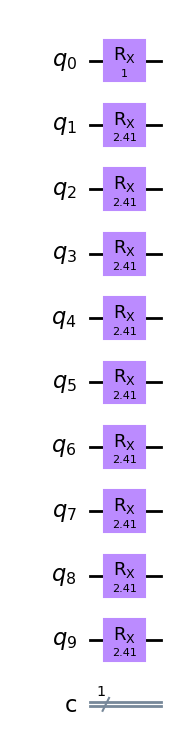

In [17]:
for i, phi_ik in enumerate(obs_k):
    
    qc.rx(phi_ik, i)
    
qc.draw("mpl")

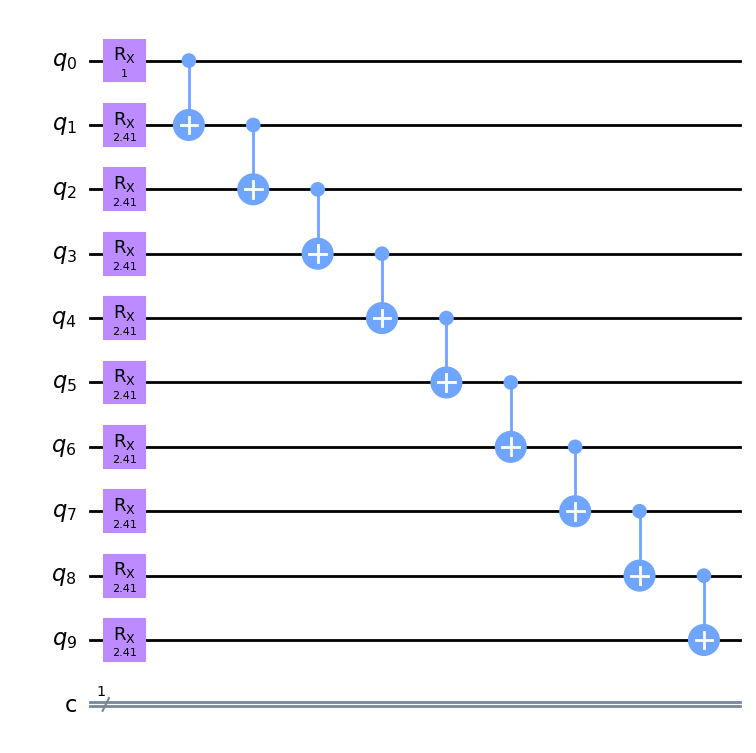

In [18]:
# CNOTs to induce entanglement

for i in range(N-1):
    
    qc.cnot(i, i+1)
    
qc.draw("mpl")

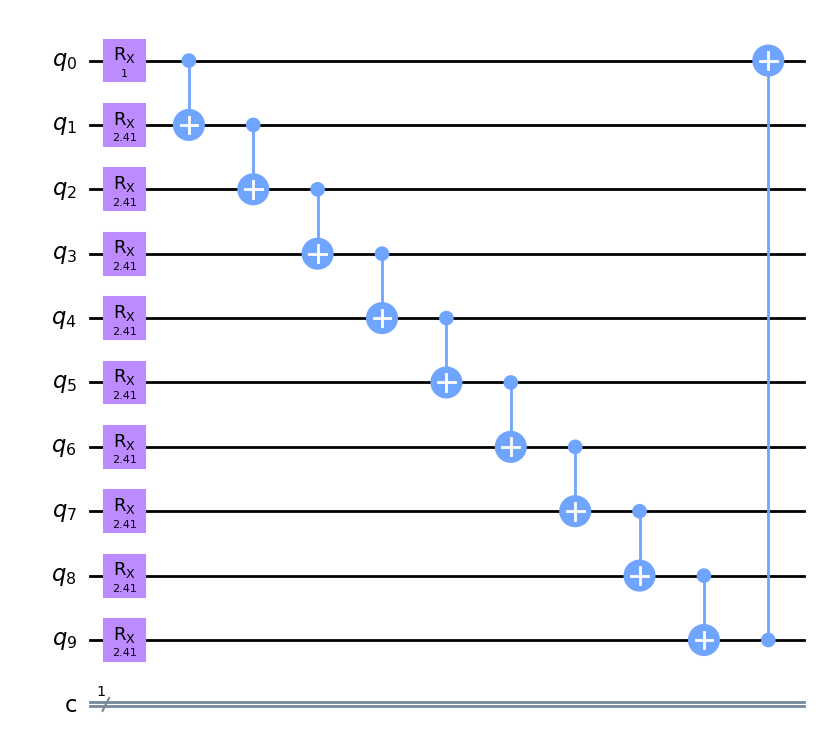

In [19]:
# CNOT, targeted on the first register

qc.cnot(N-1, 0)

qc.draw("mpl")

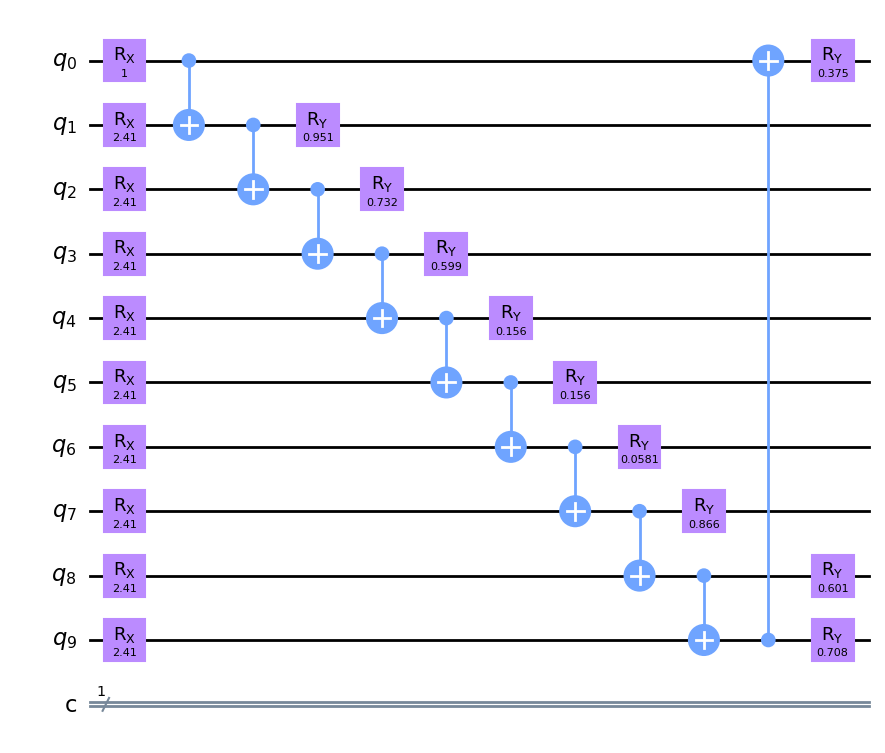

In [20]:
# parameterized rotations

# first, let's introduce a vector of (random) parameters. 
# that's the parameter vector \vec{\theta}

np.random.seed(42)
theta = np.random.uniform(0, 1, N)

for i in range(N):
    
    qc.ry(theta[i], i)
    
qc.draw("mpl")

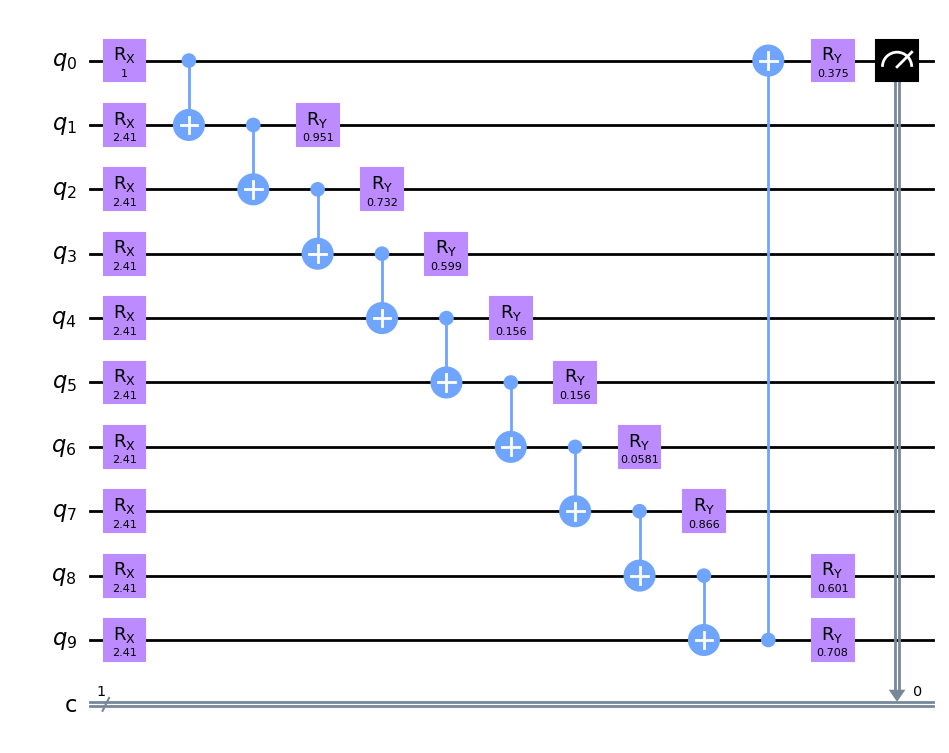

In [21]:
# measure the first qubit and put its readout in the classical register

qc.measure(0, cr)

qc.draw("mpl")

In [22]:
# import provider for simulator and define the simulator backend

from qiskit import Aer

backend = Aer.get_backend("qasm_simulator")

In [23]:
# defining the job and sending it to execute in the defined backend
# we will run the circuit a n_runs number of times
# we fix the simulator seed for reproducibility

n_runs = 1e3

from qiskit import execute

job = execute(qc, backend, shots=int(n_runs), seed_simulator=42)

In [24]:
# getting the results of the job execution

results = job.result()

results

Result(backend_name='qasm_simulator', backend_version='0.12.0', qobj_id='', job_id='bdf878f8-d7dd-4075-a185-8838b759f5a6', success=True, results=[ExperimentResult(shots=1000, success=True, meas_level=2, data=ExperimentResultData(counts={'0x0': 465, '0x1': 535}), header=QobjExperimentHeader(creg_sizes=[['c', 1]], global_phase=0.0, memory_slots=1, metadata=None, n_qubits=10, name='circuit-114', qreg_sizes=[['q', 10]]), status=DONE, seed_simulator=42, metadata={'batched_shots_optimization': False, 'method': 'statevector', 'active_input_qubits': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], 'device': 'CPU', 'remapped_qubits': False, 'num_qubits': 10, 'num_clbits': 1, 'sample_measure_time': 0.0015683, 'input_qubit_map': [[0, 0], [1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9]], 'measure_sampling': True, 'noise': 'ideal', 'parallel_shots': 1, 'parallel_state_update': 4, 'fusion': {'enabled': True, 'threshold': 14, 'max_fused_qubits': 5, 'applied': False}}, time_taken=0.0030468)], da

In [25]:
# To get the resulting counts (of measurements in the classical register),
# we use the get_counts() method

counts = results.get_counts()

counts

{'0': 465, '1': 535}

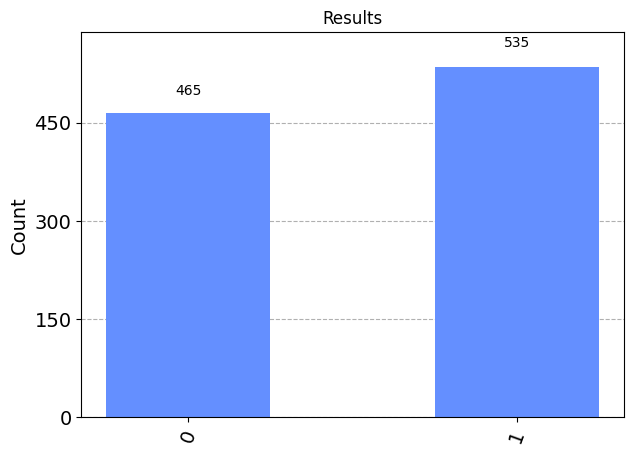

In [26]:
# ploting the counts above as a histogram

from qiskit.visualization import plot_histogram

plot_histogram(counts, title="Results")

In [27]:
p_y_k = counts["1"]/n_runs

p_y_k


0.535

In [28]:
p_y_k = counts["1"]/n_runs

p_y_k


0.535

In [29]:
y_train.iloc[k]

1

In [31]:
# functions for the circuit construction

def initialize_circuit(Nq, Nc):
    '''
    initializes a circuit with Nq quantum registers and Nc classical registers
    '''
    
    # quantum and classical registers
    qr = QuantumRegister(Nq, "q")
    cr = ClassicalRegister(Nc, "c")

    # quantum circuit
    qc = QuantumCircuit(qr, cr)

    return qc

In [32]:
def feature_map(qc, X_k):
    '''
    encodes classical data (in the array X) into the quantum circuit initial state.
    each component of the X array is encoded in the respective quantum register.
    the encoding is achieved via a Rx rotation, whose angle is the respective X component
    '''
    
    # data encoding with Rx rotations
    for i, phi_ik in enumerate(X_k):
    
        qc.rx(phi_ik, i)
        
    return qc

In [33]:
def variational_circuit(qc, theta):
    '''
    implements the variational portion of the quantum cirrcuit.
    the particular architecture will be: CNOTs between the registers;
    followed by parameterized Ry rotations (parameters defined by the argument "theta"); 
    '''
    
    # CNOTs to induce entanglement
    for i in range(N-1):
    
        qc.cnot(i, i+1)
        
    # final CNOT, targeted on the first register
    qc.cnot(N-1, 0)

    # parameterized rotations
    for i in range(N):

        qc.ry(theta[i], i)
        
    return qc
        

In [34]:
def measurement(qc):
    '''
    measure the first quantum register into the classical register
    '''
    
    qc.measure(0, -1)
    
    return qc

In [35]:
# full function to construct the circuit

def build_circuit(Nq, Nc, X, theta, k, show_circuit=True):
    '''
    construct and return the quantum circuit for the variational quantum classifier
    '''

    qc = initialize_circuit(Nq, Nc)
    
    feature_map(qc, X.iloc[k])
    
    variational_circuit(qc, theta)
    
    measurement(qc)
    
    if show_circuit:
        
        show_figure(qc.draw("mpl"))
        
    return qc

In [36]:
# functions for the circuit execution

def run_circuit(qc, simulator=True, backend_name = "qasm_simulator", n_runs=1000, seed_simulator=None):
    '''
    executes the quantum circuit in the specified backend (in the moment, it's just a simulator)
    TODO: allow for actual hardware
    the number of executions can also be specified.
    returns the results of the execution.
    '''
    
    if simulator:
        
        # import provider for simulator and define the simulator backend
        backend = Aer.get_backend(backend_name)
        
    else:
        
        pass
        # # todo: quantum hardware
        # backend = ...
        
    # defining the job and sending it to execute in the defined backend
    # we will run the circuit a n_runs number of times
    job = execute(qc, backend, shots=n_runs, seed_simulator=seed_simulator)
    
    # getting the results of the job execution
    results = job.result()
    
    return results


In [37]:
def show_figure(fig):
    '''
    auxiliar function to display plot 
    even if it's not the last command of the cell
    from: https://github.com/Qiskit/qiskit-terra/issues/1682
    '''
    
    new_fig = plt.figure()
    new_mngr = new_fig.canvas.manager
    new_mngr.canvas.figure = fig
    fig.set_canvas(new_mngr.canvas)
    plt.show(fig)


In [38]:
def final_answer(results, thresh=0.5, n_runs=1000, visualize_results=False):
    '''
    calculate the probability of the observation belonging to class 1
    i.e., like the logit, calculation of P(y=1|x). 
    the actual class prediction is also calculated. both are returned.
    an optional visualization of the execution results as a histogram is also available
    '''

    # getting the resulting counts (of measurements in the classical register),
    counts = results.get_counts()
    
    if visualize_results:
        # ploting the counts as a histogram
        show_figure(plot_histogram(counts, title="Results"))
        
    # p(y=1 | x) - probability of observation belonging to class 1
    p_y = counts["1"]/n_runs
    
    # actual prediction, according to the specified threshold
    y_pred = 1 if p_y > thresh else 0
    
    return p_y, y_pred

In [39]:
# full vqc function (takes the quantum circuit as input and executes it)
def vqc(qc, simulator=True, backend_name="qasm_simulator", n_runs=1000,
        thresh=0.5, visualize_results=False, seed_simulator=None):

    '''
    this function integrates all the functions above in a single structure
    and returns p_y
    the only input is the integer k, used as an index for the chosen observation
    returns the final answer (probability and prediction)
    '''
    
    results = run_circuit(qc, seed_simulator=seed_simulator)

    return final_answer(results, visualize_results=visualize_results)

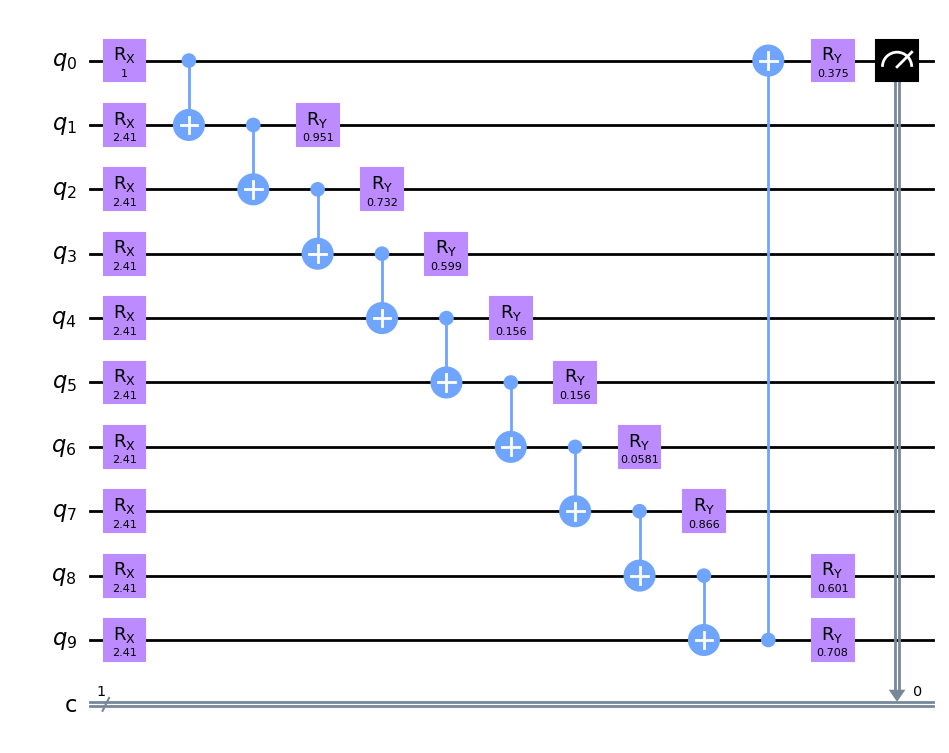

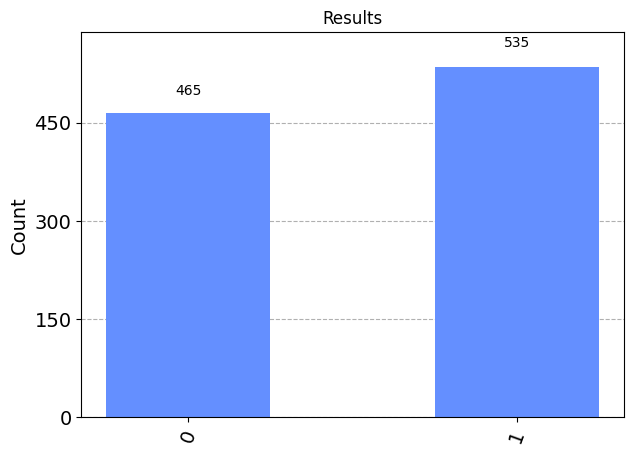

Predicted p(y=1|x) for the 0-th training observation: 0.535
Therefore, this observation is classified as 1


In [40]:
np.random.seed(42)
theta = np.random.uniform(0, 1, N)

qc = build_circuit(N, 1, X_train, theta, k=0, show_circuit=True)

p_y_k, y_pred_k = vqc(qc, seed_simulator=42, visualize_results=True)

print("Predicted p(y=1|x) for the " + str(k) + "-th training observation:", p_y_k)
print("Therefore, this observation is classified as", y_pred_k)


In [41]:
def loss_SE(p_y_k, y, k):
    '''
    computes the squared error (SE) loss
    '''
    
    return (p_y_k - y.iloc[k])**2

In [42]:
loss_SE(p_y_k, y_train, k)

0.21622499999999997

In [43]:
def gradient(N, X, y, k, p_y_k, theta, delta=5e-3, seed_simulator=None):   
    '''
    computes the directional derivative using the finite difference method
    '''
    
    theta_list = []
    for i in range(len(theta)):

        theta_list.append(theta.copy())
        theta_list[-1][i] = theta_list[-1][i] + delta
    
    del_theta = []
    
    for theta_pd in theta_list:
        
        # below, pd = "plus delta"
        
        qc_pd = build_circuit(N, 1, X, theta_pd, k, show_circuit=False)
        p_y_k_pd, _ = vqc(qc_pd, seed_simulator=seed_simulator)

        loss_theta = loss_SE(p_y_k, y, k)
        loss_theta_pd = loss_SE(p_y_k_pd, y, k)

        derivative = (loss_theta_pd - loss_theta)/delta

        del_theta.append(derivative)
        
    return np.array(del_theta)

In [44]:

def train_accuracy(y_pred_k, y, k):
    
    return 1 if y_pred_k == y.iloc[k] else 0


In [45]:
def stochastic_gd(N, X, y, theta, lr = 5e-2, num_epochs=50, show_progress=True, seed_simulator=None):
    
    loss_each_epoch = []
    accuracy_each_epoch = []
    
    if show_progress:
        print("Epoch \t Loss \t Training Accuracy")
    
    for n in range(num_epochs):
        
        loss_inter_epoch = []
        accuracy_inter_epoch = []
        
        for k in range(X.shape[0]):
        
            qc = build_circuit(N, 1, X, theta, k, show_circuit=False)

            p_y_k, y_pred_k = vqc(qc, seed_simulator=seed_simulator)
            
            loss_inter_epoch.append(loss_SE(p_y_k, y, k))
            
            accuracy_inter_epoch.append(train_accuracy(y_pred_k, y, k))
            
            theta = theta - lr * gradient(N, X, y, k, p_y_k, theta, seed_simulator=seed_simulator)
    
        loss_each_epoch.append(np.mean(loss_inter_epoch)) 
        accuracy_each_epoch.append(np.mean(accuracy_inter_epoch)) 
        
        if show_progress:
            print(n+1, "\t", round(loss_each_epoch[-1], 3), "\t", round(accuracy_each_epoch[-1], 3))
            
    return loss_each_epoch, accuracy_each_epoch, theta

In [ ]:
N = X_train.shape[1]

np.random.seed(42)

theta = np.random.uniform(0, 2*np.pi, N)

# making a copy for later comparison
theta_0 = theta.copy()

num_epochs = 20

training_loss, training_accuracy, theta_final = stochastic_gd(N, X_train, y_train, theta,
                                                              lr =float(0.01), num_epochs=int(num_epochs), 
                                                              seed_simulator=42)

Epoch 	 Loss 	 Training Accuracy


In [ ]:
plt.title("Loss function during training")

sns.lineplot(x = range((len(training_loss))), y=training_loss, color="blue")

plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.show()

plt.title("Accuracy during training")

sns.lineplot(x = range((len(training_accuracy))), y=training_accuracy, color="orange")

plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.show()

In [49]:
print("Final variational parameters vector:", theta_final)

print("\nMean training accuracy in the", num_epochs, "epochs:", np.mean(training_accuracy))

Final variational parameters vector: [2.62047497 5.97351416 4.59925358 3.76148219]

Mean training accuracy in the 20 epochs: 0.821875


In [50]:
y_pred = []

for k in range(X_test.shape[0]):
    
    qc = build_circuit(N, 1, X_test, theta_final, k, show_circuit=False)

    _, y_pred_k = vqc(qc, seed_simulator=42)
                      
    y_pred.append(y_pred_k)

In [51]:

print("Quantum classifier (VQC):\n")

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

execution_time = time.time() - start_time

# Print the execution time
print("Execution time: {:.2f} seconds".format(execution_time))

Quantum classifier (VQC):

              precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.83      1.00      0.91        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg       0.92      0.90      0.90        20

[[ 8  2]
 [ 0 10]]
Execution time: 408.75 seconds
